In [1]:
import pandas as pd
import numpy as np

In [2]:
df_diabetes = pd.read_csv('diabetic_data.csv')
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data cleaning

## Check for missing values

From the information above, max_glu_serum and A1Cresult columns has missing values. Lets calculate what percent of values are missing.

In [4]:
max_glu_serum_null = df_diabetes['max_glu_serum'].isnull().sum()
max_glu_serum_percentage_null = round((max_glu_serum_null/df_diabetes.shape[0])*100,2)
print(f'max_glu_serum column has {max_glu_serum_null} i.e. {max_glu_serum_percentage_null} % null values.')

max_glu_serum column has 0 i.e. 0.0 % null values.


In [5]:
A1Cresult_null = df_diabetes['A1Cresult'].isnull().sum()
A1Cresult_percentage_null = round((A1Cresult_null/df_diabetes.shape[0])*100,2)
print(f'A1Cresult column has {A1Cresult_null} i.e. {A1Cresult_percentage_null} % null values.')

A1Cresult column has 0 i.e. 0.0 % null values.


In [6]:
df_diabetes['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

94.75 % of values are missing and we can drop the column. OR if it is clinically important feature, we should check with SME if we can impute with mode i.e., "Norm".

In [7]:
df_diabetes['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

83.28 % of values are missing and we can drop the column. OR if it is a clinically important feature, we should check with SME if we can impute with mode i.e., ">8".

## Explore the dataset for unique values in each column

In [8]:
for x in df_diabetes.select_dtypes('object'):
    print(df_diabetes[x].value_counts())
    print("--"*20)

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
----------------------------------------
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
----------------------------------------
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
----------------------------------------
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
----------------------------------------
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM    

The following columns have respective invalid values:
race - ?
gender - Unknown/Invalid
weight - ?
payer_code - ?
medical_specialty - ?

Lets also check if we missed any columns which has '?'.

In [9]:
# Initialize an empty list to store column names with '?'
quest_columns = []

# Initialize a dictionary to store the count of '?' occurrences in each column
quest_counts = {}

# Iterate over columns in the DataFrame
for x in df_diabetes.columns:
    # Check if any value in the column is equal to '?'
    if '?' in df_diabetes[x].values:
        quest_columns.append(x)
        # Count the number of '?' occurrences in the column
        quest_counts[x] = (df_diabetes[x] == '?').sum()

# Print the list of columns with '?' and their respective counts
print("Columns with '?' values:", quest_columns)
print("Number of '?' occurrences in each column:")
for col, count in quest_counts.items():
    print(f"{col}: {count}")

Columns with '?' values: ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
Number of '?' occurrences in each column:
race: 2273
weight: 98569
payer_code: 40256
medical_specialty: 49949
diag_1: 21
diag_2: 358
diag_3: 1423


<ipython-input-9-b0144b84ff8f>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in df_diabetes[x].values:


So we have '?' in 'diag_1', 'diag_2' and 'diag_3' columns also.

### Finding percentage of respective invalid values for each column

In [10]:
dict_invalid_values = {'race': '?', 'gender':'Unknown/Invalid','weight':'?','payer_code':'?','medical_specialty':'?', 'diag_1':'?', 'diag_2':'?', 'diag_3':'?'}

In [11]:
def invalid_values():
    for colname in dict_invalid_values:
        colname_invalid = (df_diabetes[colname]==dict_invalid_values[colname]).sum()
        colname_percentage_invalid = round((colname_invalid/df_diabetes[colname].count())*100,2)
        print(f"\033[1m{colname}\033[0m column has \033[1m{colname_invalid}\033[0m (\033[1m{colname_percentage_invalid} %\033[0m) invalid({dict_invalid_values[colname]}) values.")

In [12]:
invalid_values()

race column has 2273 (2.23 %) invalid(?) values.
gender column has 3 (0.0 %) invalid(Unknown/Invalid) values.
weight column has 98569 (96.86 %) invalid(?) values.
payer_code column has 40256 (39.56 %) invalid(?) values.
medical_specialty column has 49949 (49.08 %) invalid(?) values.
diag_1 column has 21 (0.02 %) invalid(?) values.
diag_2 column has 358 (0.35 %) invalid(?) values.
diag_3 column has 1423 (1.4 %) invalid(?) values.


As per the above information, we can impute the race column "?" values by most frequent value "Caucasian", delete the rows which has "Unknown/Invalid" in gender column, drop the weight column as it has 96% invalid values. We have to think about payer_code, medical_specialty as they have significant invalid values i.e., 40 and 50 % approx respectively.

In [13]:
df_diabetes['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [14]:
print(df_diabetes['medical_specialty'].value_counts())

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
Psychiatry-Addictive                 1
Proctology                           1
Dermatology                          1
SportsMedicine                       1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


For 'payer_code', we can replace "?" by 'MC', and for 'medical_specialty', we can replace "?" by 'InternalMedicine'. Here we are using most frequent value for imputation. Anyhow this should be reviewed by SME for relavence.

I think 'diag_1', 'diag_2' and 'diag_3' data should not be imputed, because it may be misleading as they are diagnosis data. Hence I think we should drop those rows as the percentage of invaled values are comparitively less. Again advise of SME will be helpful here.

### Imputation

In [15]:
# Taking copy of the data set
df = df_diabetes.copy()

In [16]:
# No. of columns before dropping
df.shape[1]

50

In [17]:
# Dropping 'max_glu_serum','A1Cresult', 'weight' columns.
df.drop(['max_glu_serum','A1Cresult', 'weight'], axis=1, inplace=True)

In [18]:
# No. of columns after dropping
df.shape[1]

47

In [19]:
# For race column, replace "?" by "Caucasian"
df['race']= df['race'].replace('?', 'Caucasian')
# For payer_code column, replace "?" by "MC"
df['payer_code']= df['payer_code'].replace('?', 'MC')
# For medical_specialty column, replace "?" by "InternalMedicine"
df['medical_specialty']= df['medical_specialty'].replace('?', 'InternalMedicine')

Now lets drop rows by condition

In [20]:
drop_condition = ((df['gender'] == 'Unknown/Invalid') | (df['diag_1'] == '?') | (df['diag_2'] == '?') | (df['diag_3'] == '?'))
df = df[~drop_condition]

In [21]:
# Now there should not be any "?" in the dataset.
np.sum(df.values == '?')

0

In [22]:
# Also there shouldn't be any null values
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [23]:
# Now lets check the shape of the dataframe
print(f'Initial shape: {df_diabetes.shape}')
print(f'Shape after cleaning: {df.shape}')
print(f'So, no. of rows deleted: {df_diabetes.shape[0]-df.shape[0]} ({round(((df_diabetes.shape[0]-df.shape[0])/df_diabetes.shape[0])*100,2)} %), and no. of columns deleted: {df_diabetes.shape[1]-df.shape[1]}  ({round(((df_diabetes.shape[1]-df.shape[1])/df_diabetes.shape[1])*100,2)} %)')

Initial shape: (101766, 50)
Shape after cleaning: (100241, 47)
So, no. of rows deleted: 1525 (1.5 %), and no. of columns deleted: 3  (6.0 %)


# Data pre-processing

In [24]:
# Taking copy of the data set
df_cleaned = df.copy()

In [25]:
# Duplication check
df_cleaned.duplicated().sum()

0

Exploring data again to check the no. of unique values to deciding on charecter encoding

In [26]:
print("Object columns and their corresponding total unique values:")
for x in df_cleaned.select_dtypes('object'):
    print(f' {x} - {df_cleaned[x].nunique()}', end=', ')

Object columns and their corresponding total unique values:
 race - 5,  gender - 2,  age - 10,  payer_code - 17,  medical_specialty - 72,  diag_1 - 715,  diag_2 - 743,  diag_3 - 789,  metformin - 4,  repaglinide - 4,  nateglinide - 4,  chlorpropamide - 4,  glimepiride - 4,  acetohexamide - 2,  glipizide - 4,  glyburide - 4,  tolbutamide - 2,  pioglitazone - 4,  rosiglitazone - 4,  acarbose - 4,  miglitol - 4,  troglitazone - 2,  tolazamide - 3,  examide - 1,  citoglipton - 1,  insulin - 4,  glyburide-metformin - 4,  glipizide-metformin - 2,  glimepiride-pioglitazone - 2,  metformin-rosiglitazone - 2,  metformin-pioglitazone - 2,  change - 2,  diabetesMed - 2,  readmitted - 3, 

In [27]:
print("Integer columns and their corresponding total unique values:")
for x in df_cleaned.select_dtypes('int'):
    print(f' {x} - {df_cleaned[x].nunique()}', end=', ')

Integer columns and their corresponding total unique values:


Based on the numbers above, 
we can apply one-hot encoding for the following columns: race, admission_type_id, discharge_disposition_id, admission_source_id, payer_code and all the medications except (acetohexamide, tolbutamide, troglitazone, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone and metformin-pioglitazone, where we can use binary encoding). 
We can apply binary encoding to the forllowing columns: gender, change, diabetesMed and all other medications mentioned before as exception for one-hot.
We need to apply label/ordinal encoding for the age column. 
We need to group and then aplly one-hot encoding (OR Target encoding) for other columns I guess: medical_specialty, diag_1, diag_2 and diag_3.
We can drop the following columns I guess: (encounter_id and patient_nbr as they are IDs) and (examide and citoglipton as they have only one unique value)

In [28]:
# Creating a list of columns which containg only 2 unique values
list_binary_encd = []
for x in df_cleaned.columns:
    if df_cleaned[x].nunique() == 2:
        list_binary_encd.append(x)

In [29]:
list_binary_encd

['gender',
 'acetohexamide',
 'tolbutamide',
 'troglitazone',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [30]:
# Function for binary encoding (when we have only two categories in a column, we can replace first valure with 0 and second value with 1)
def binary_encode (lst):
    for x in lst:
        unique_values = df_cleaned[x].unique()
        df_cleaned[x] = df_cleaned[x].map({unique_values[0]:0, unique_values[1]:1})
        print(f'In {x} column, apllied following mapping: {unique_values[0]} - 0, {unique_values[1]} - 1')

In [31]:
#Applying binary encoding
binary_encode(list_binary_encd)

In gender column, apllied following mapping: Female - 0, Male - 1
In acetohexamide column, apllied following mapping: No - 0, Steady - 1
In tolbutamide column, apllied following mapping: No - 0, Steady - 1
In troglitazone column, apllied following mapping: No - 0, Steady - 1
In glipizide-metformin column, apllied following mapping: No - 0, Steady - 1
In glimepiride-pioglitazone column, apllied following mapping: No - 0, Steady - 1
In metformin-rosiglitazone column, apllied following mapping: No - 0, Steady - 1
In metformin-pioglitazone column, apllied following mapping: No - 0, Steady - 1
In change column, apllied following mapping: Ch - 0, No - 1
In diabetesMed column, apllied following mapping: Yes - 0, No - 1


In [32]:
df_cleaned.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,0,[10-20),1,1,7,3,MC,...,No,Up,No,0,0,0,0,0,0,>30
2,64410,86047875,AfricanAmerican,0,[20-30),1,1,7,2,MC,...,No,No,No,0,0,0,0,1,0,NO
3,500364,82442376,Caucasian,1,[30-40),1,1,7,2,MC,...,No,Up,No,0,0,0,0,0,0,NO
4,16680,42519267,Caucasian,1,[40-50),1,1,7,1,MC,...,No,Steady,No,0,0,0,0,0,0,NO
5,35754,82637451,Caucasian,1,[50-60),2,1,2,3,MC,...,No,Steady,No,0,0,0,0,1,0,>30


In [33]:
df_cleaned['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [34]:
# Ordinal encoding for age column
df_cleaned['age'] = df_cleaned['age'].map({'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10})

In [35]:
df_cleaned['age'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10,  1], dtype=int64)

In [36]:
# Chapter mapping based on ICD-9 chapters
icd9_chapter_mapping = {
    '001-139': '001-139', # 'Infectious And Parasitic Diseases'
    '140-239': '140-239', # 'Neoplasms'
    '240-279': '240-279', # 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'
    '280-289': '280-289', # 'Diseases Of The Blood And Blood-Forming Organs'
    '290-319': '290-319', # 'Mental Disorders'
    '320-389': '320-389', # 'Diseases Of The Nervous System And Sense Organs'
    '390-459': '390-459', # 'Diseases Of The Circulatory System'
    '460-519': '460-519', # 'Diseases Of The Respiratory System'
    '520-579': '520-579', # 'Diseases Of The Digestive System'
    '580-629': '580-629', # 'Diseases Of The Genitourinary System'
    '630-679': '630-679', # 'Complications Of Pregnancy, Childbirth, And The Puerperium'
    '680-709': '680-709', # 'Diseases Of The Skin And Subcutaneous Tissue'
    '710-739': '710-739', # 'Diseases Of The Musculoskeletal System And Connective Tissue'
    '740-759': '740-759', # 'Congenital Anomalies'
    '760-779': '760-779', # 'Certain Conditions Originating In The Perinatal Period'
    '780-799': '780-799', # 'Symptoms, Signs, And Ill-Defined Conditions'
    '800-999': '800-999', # 'Injury And Poisoning'
    'V01-V91': 'V01-V91', # 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'
    'E000-E999': 'E000-E999' # 'Supplementary Classification Of External Causes Of Injury And Poisoning'
}

In [37]:
# Function to extract the chapter from the code
def get_chapter(icd_code):
    if icd_code.startswith('E'):
        return icd9_chapter_mapping['E000-E999']
    elif icd_code.startswith('V'):
        return icd9_chapter_mapping['V01-V91']
    else:
        for range_key, chapter_name in icd9_chapter_mapping.items():
            range_start, range_end = map(int, range_key.split('-'))
            code_num = int(icd_code.split('.')[0])
            if range_start <= code_num <= range_end:
                return chapter_name
    return 'Other'

In [38]:
# Apply the function to each ICD code columns
df_cleaned['diag_1'] = df_cleaned['diag_1'].apply(get_chapter)
df_cleaned['diag_2'] = df_cleaned['diag_2'].apply(get_chapter)
df_cleaned['diag_3'] = df_cleaned['diag_3'].apply(get_chapter)


In [39]:
df_cleaned['diag_1'].unique()

array(['240-279', '630-679', '001-139', '140-239', '390-459', '460-519',
       '800-999', '680-709', '710-739', '520-579', 'V01-V91', '780-799',
       '580-629', '290-319', '320-389', '280-289', '740-759', 'E000-E999'],
      dtype=object)

In [40]:
df_cleaned['medical_specialty'].unique()

array(['InternalMedicine', 'Family/GeneralPractice', 'Cardiology',
       'Surgery-General', 'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Pediatrics-Endocrinology', 'Surgery-Colon&Rectal',
       'Endocrinology', 'Urology', 'Pediatrics-CriticalCare',
       'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Podiatry', 'Gynecology',
       'Oncology', 'Pediatrics-Neurology', 'Surgery-Plastic',
       'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck',
       'Psychology', 'Ophthalmology', 'Surgery-Pediatric',
       'PhysicalMedicineandRehabilitation', 'InfectiousDiseases',
       

In [41]:
# Define the grouping for medical_specialty column
grouping = {
    'Primary Care': [
        'InternalMedicine', 'Family/GeneralPractice', 'Pediatrics',
        'ObstetricsandGynecology', 'Pediatrics-Endocrinology',
        'Pediatrics-CriticalCare', 'Pediatrics-Pulmonology',
        'Pediatrics-Neurology', 'Pediatrics-EmergencyMedicine',
        'Pediatrics-InfectiousDiseases', 'Pediatrics-AllergyandImmunology',
        'Pediatrics-Hematology-Oncology', 'Obstetrics'
    ],
    'Surgery': [
        'Surgery-General', 'Orthopedics', 'Surgery-Cardiovascular/Thoracic',
        'Surgery-Neuro', 'Surgery-Colon&Rectal', 'Surgery-Plastic',
        'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck',
        'Surgery-Pediatric', 'Surgery-Maxillofacial', 'Surgery-Vascular',
        'Surgery-Cardiovascular', 'Orthopedics-Reconstructive'
    ],
    'Specialized Medicine': [
        'Cardiology', 'Gastroenterology', 'Nephrology', 'Psychiatry',
        'Emergency/Trauma', 'Pulmonology', 'Hematology/Oncology',
        'Otolaryngology', 'Endocrinology', 'Urology',
        'Psychiatry-Child/Adolescent', 'Neurology', 'Radiology',
        'Podiatry', 'Gynecology', 'Oncology', 'Psychology',
        'Ophthalmology', 'PhysicalMedicineandRehabilitation',
        'InfectiousDiseases', 'Rheumatology', 'AllergyandImmunology',
        'Hematology', 'Proctology', 'Pathology', 'Dermatology',
        'SportsMedicine', 'Cardiology-Pediatric', 'Neurophysiology',
        'Endocrinology-Metabolism', 'Obsterics&Gynecology-GynecologicOnco'
    ],
    'Other Services': [
        'Anesthesiology', 'Anesthesiology-Pediatric', 'Dentistry',
        'Surgeon', 'Osteopath', 'Psychiatry-Addictive',
        'PhysicianNotFound', 'SurgicalSpecialty', 'Radiologist',
        'Speech', 'Hospitalist', 'OutreachServices', 'Perinatology',
        'DCPTEAM', 'Resident'
    ]
}

In [42]:
# Function to categorize each specialty
def categorize_specialty(specialty):
    for group, specialties in grouping.items():
        if specialty in specialties:
            return group
    return specialty

In [43]:
# Apply the categorization function to the medical_specialty column
df_cleaned['medical_specialty'] = df_cleaned['medical_specialty'].apply(categorize_specialty)

In [44]:
df_cleaned['medical_specialty'].unique()

array(['Primary Care', 'Specialized Medicine', 'Surgery',
       'Other Services'], dtype=object)

In [45]:
# Dropping 'encounter_id,  patient_nbr, examide and citoglipton columns.
df_cleaned.drop(['examide', 'citoglipton'], axis=1, inplace=True)

In [46]:
# Encoding readmitted column: '<30' = 0, '>30' = 1, 'NO' = 2
df_cleaned['readmitted'] = df_cleaned['readmitted'].map({'<30':0, '>30':0, 'NO':1})

In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100241 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100241 non-null  int64 
 1   patient_nbr               100241 non-null  int64 
 2   race                      100241 non-null  object
 3   gender                    100241 non-null  int64 
 4   age                       100241 non-null  int64 
 5   admission_type_id         100241 non-null  int64 
 6   discharge_disposition_id  100241 non-null  int64 
 7   admission_source_id       100241 non-null  int64 
 8   time_in_hospital          100241 non-null  int64 
 9   payer_code                100241 non-null  object
 10  medical_specialty         100241 non-null  object
 11  num_lab_procedures        100241 non-null  int64 
 12  num_procedures            100241 non-null  int64 
 13  num_medications           100241 non-null  int64 
 14  numb

In [48]:
dtrain= pd.get_dummies(df_cleaned, drop_first=True)
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
train = dtrain
target = 'readmitted'
IDcol1 = 'encounter_id'
IDcol2 = 'patient_nbr'

In [49]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100241 entries, 1 to 101765
Columns: 140 entries, encounter_id to glyburide-metformin_Up
dtypes: int64(25), uint8(115)
memory usage: 30.9 MB


In [50]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on data
    alg.fit(dtrain[predictors], dtrain['readmitted'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['readmitted'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['readmitted'], dtrain_predprob))
                    
    # Assuming 'alg' is your trained model and 'get_booster().get_fscore()' returns a dictionary of feature importances
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)

    # Set the figure size to make it wider
    plt.figure(figsize=(16, 6))

    # Create a bar plot
    feat_imp.plot(kind='bar', title='Feature Importances')

    # Set the y-axis label
    plt.ylabel('Feature Importance Score')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)

    # Adjust the layout to prevent labels from overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

In [51]:
from xgboost import XGBClassifier

In [52]:
predictors = [x for x in train.columns if x not in [target, IDcol1, IDcol2]]
xgb2 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

In [53]:
import matplotlib.pyplot as plt


Model Report
Accuracy : 0.6748
AUC Score (Train): 0.741165


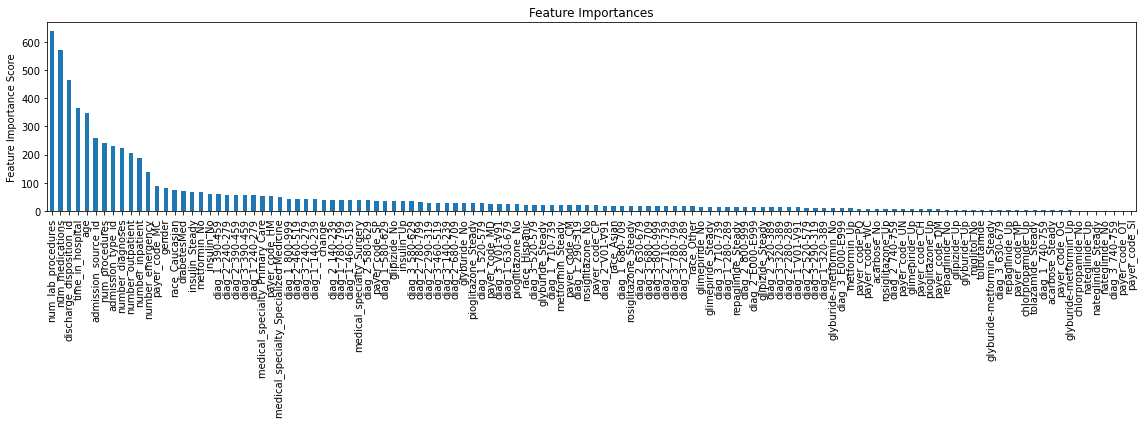

In [54]:
modelfit(xgb2, train, predictors)

In [55]:
param_test1 = { 'max_depth':list(range(3,10,2)), 'min_child_weight':list(range(1,6,2))}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc', n_jobs=4, refit=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 5}, 0.6900277594414247)

In [56]:
param_test2 = { 'max_depth':[8,9,10], 'min_child_weight':[4,5,6] }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,refit=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 8, 'min_child_weight': 6}, 0.6871730823076321)

In [57]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,refit=False, cv=5)
gsearch2b.fit(train[predictors],train[target])
gsearch2b.best_params_, gsearch2b.best_score_

({'min_child_weight': 8}, 0.6877227103562941)

In [58]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,refit=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.2}, 0.6876205486040817)


Model Report
Accuracy : 0.6931
AUC Score (Train): 0.765555


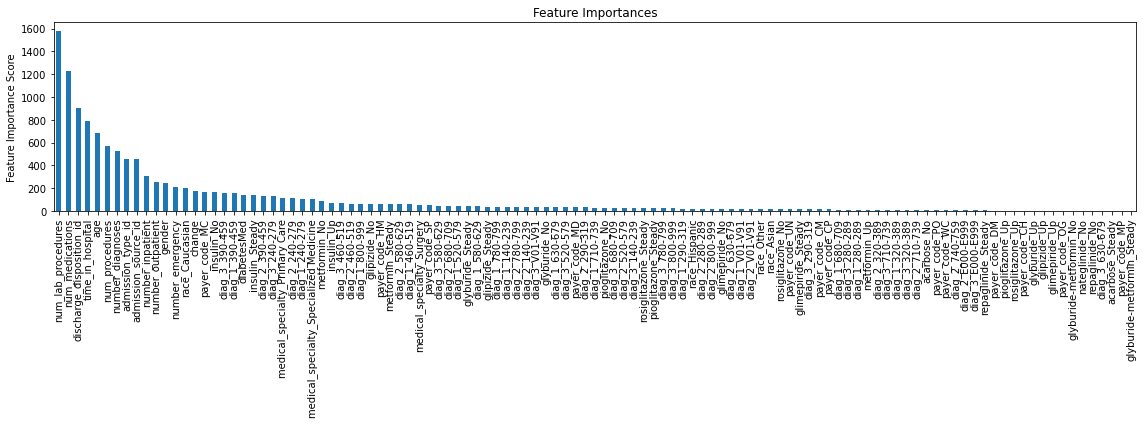

In [59]:
predictors = [x for x in train.columns if x not in [target, IDcol1, IDcol2]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)